<a href="https://colab.research.google.com/github/LicaCepillo/LicaCepillo/blob/main/test_Z_2_amostras_independentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TESTE Z para duas amostras independentes

#### Número de amostras maior ou igual a 30.

#### Necessita conhecimento do desvio padrão.

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Python_projetos_reforço/enem_2019_tratado.csv',sep=',', encoding='iso-8859-1')

In [3]:
enem_sp.head()

,INSCRICAO,MUNICIPIO,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,solteiro,parda,brasileiro(a),1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,solteiro,parda,brasileiro(a),2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,solteiro,parda,brasileiro(a),2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,solteiro,parda,brasileiro(a),2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,solteiro,branca,brasileiro(a),1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Objetivo: Analisar a diferença entre as médias de mulheres e homens para a nota de um dos componentes de redação do colégio x.

In [4]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [5]:
colegiox.shape

(41, 28)

In [6]:
colegiox.head()

,INSCRICAO,MUNICIPIO,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,solteiro,parda,brasileiro(a),2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,solteiro,parda,brasileiro(a),2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [7]:
colegiox_mulher = colegiox.loc[colegiox.SEXO =='F']

In [8]:
colegiox_mulher.head()

,INSCRICAO,MUNICIPIO,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
44,"1,90E+11",Águas de Lindóia,17,F,solteiro,parda,brasileiro(a),2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
79,"1,90E+11",Águas de Lindóia,18,F,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim
84,"1,90E+11",Águas de Lindóia,19,F,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,420.6,Espanhol,1.0,140.0,40.0,40.0,120.0,20.0,360.0,Sim
91,"1,90E+11",Águas de Lindóia,18,F,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,537.9,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim


In [9]:
colegiox_mulher.shape

(28, 28)

In [10]:
colegiox_homem = colegiox.loc[colegiox.SEXO == 'M']

In [11]:
colegiox_homem.shape

(13, 28)

In [12]:
colegiox_homem.head()

,INSCRICAO,MUNICIPIO,IDADE,SEXO,ESTADO_CIVIL,RACA,NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
65,"1,90E+11",Águas de Lindóia,17,M,solteiro,parda,brasileiro(a),2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
85,"1,90E+11",Águas de Lindóia,18,M,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,508.2,Espanhol,1.0,140.0,140.0,120.0,160.0,120.0,680.0,Sim
108151,"1,90E+11",Águas de Lindóia,18,M,solteiro,branca,brasileiro(a),2,pública,35017632.0,...,705.3,Inglês,1.0,140.0,160.0,120.0,140.0,100.0,660.0,Sim
182519,"1,90E+11",Águas de Lindóia,17,M,solteiro,parda,brasileiro(a),2,pública,35017632.0,...,480.9,Espanhol,1.0,100.0,120.0,100.0,100.0,100.0,520.0,Sim


## Analisar a calssificação das variáveis

In [13]:
colegiox.dtypes

INSCRICAO             object
MUNICIPIO             object
IDADE                  int64
SEXO                  object
ESTADO_CIVIL          object
RACA                  object
NACIONALIDADE         object
TP_ST_CONCLUSAO        int64
ESCOLA                object
CO_ESCOLA            float64
NO_MUNICIPIO_ESC      object
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
TP_PRESENCA_MT         int64
NOTA_CN              float64
NOTA_CH              float64
NOTA_LC              float64
NOTA_MT              float64
TP_LINGUA             object
TP_STATUS_REDACAO    float64
COMP1                float64
COMP2                float64
COMP3                float64
COMP4                float64
COMP5                float64
NOTA_REDACAO         float64
INTERNET              object
dtype: object

## Analisar valores missing

In [14]:
colegiox.isnull().sum()

INSCRICAO            0
MUNICIPIO            0
IDADE                0
SEXO                 0
ESTADO_CIVIL         0
RACA                 0
NACIONALIDADE        0
TP_ST_CONCLUSAO      0
ESCOLA               0
CO_ESCOLA            0
NO_MUNICIPIO_ESC     0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
TP_PRESENCA_MT       0
NOTA_CN              0
NOTA_CH              0
NOTA_LC              0
NOTA_MT              0
TP_LINGUA            0
TP_STATUS_REDACAO    0
COMP1                0
COMP2                0
COMP3                0
COMP4                0
COMP5                0
NOTA_REDACAO         0
INTERNET             0
dtype: int64

### Analisar outliers

In [15]:
import plotly.express as px


In [16]:
grafico = px.box(colegiox_mulher, y='COMP5')
grafico.show()

In [17]:
grafico = px.box(colegiox_homem, y='COMP5')
grafico.show()

### Analisar Normalidade

Critérios:

NÍVEL DE SIGNINFICANCIA DE 0,05 OU 5% (MAIS UTILIZADO)

QUANDO P> 0,05 (DISTRIBUIÇÃO NORMAL)

In [18]:
import scipy.stats as stats

In [19]:
# Test Shapiro-Wilk
stats.shapiro(colegiox_mulher.COMP5)

ShapiroResult(statistic=0.9521203637123108, pvalue=0.2238943725824356)

In [20]:
# Test Shapiro-Wilk
stats.shapiro(colegiox_homem.COMP5)

ShapiroResult(statistic=0.942307710647583, pvalue=0.48747217655181885)

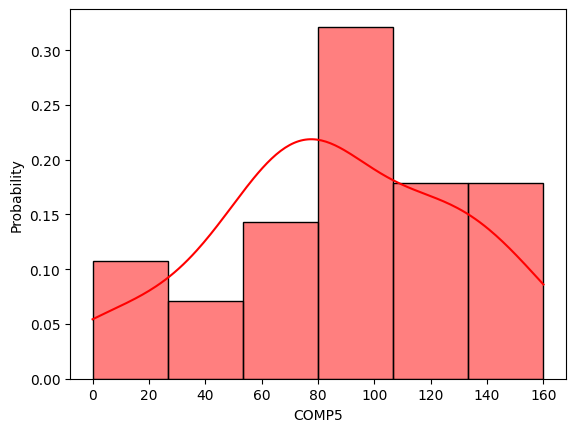

In [21]:
import seaborn as sns
sns.histplot(colegiox_mulher, x='COMP5', bins=6, color='red', kde= True, stat='probability');

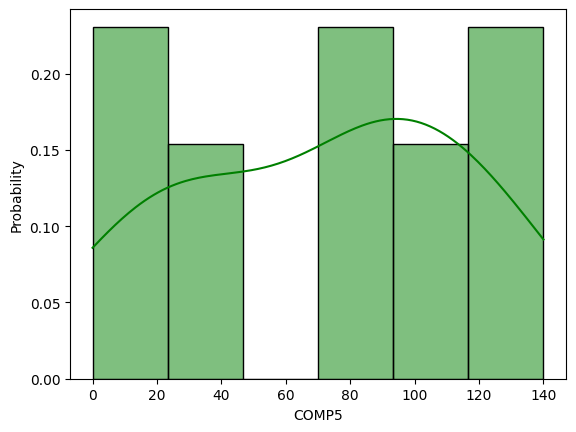

In [22]:
sns.histplot(colegiox_homem, x='COMP5', bins=6, color='green', kde= True, stat='probability');

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt

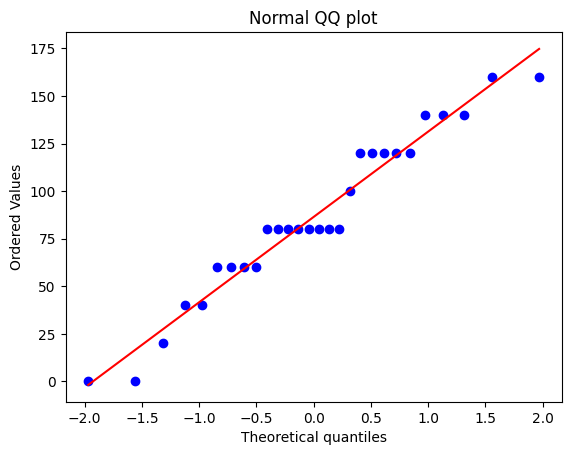

In [24]:
stats.probplot(colegiox_mulher['COMP5'],dist='norm',plot=plt)
plt.title('Normal QQ plot')
plt.show()

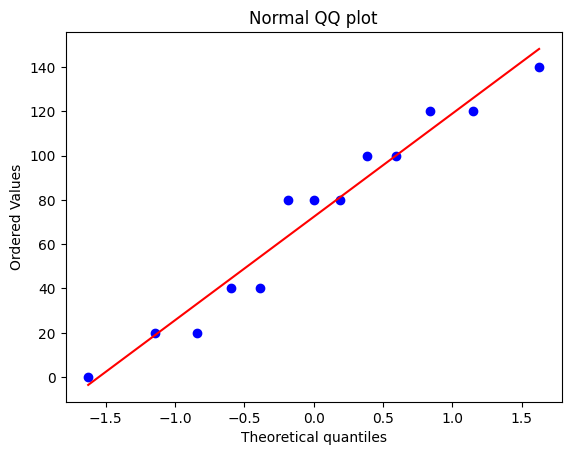

In [25]:
stats.probplot(colegiox_homem['COMP5'],dist='norm',plot=plt)
plt.title('Normal QQ plot')
plt.show()

## Homogeneidade das variâncias (HOMOCEDASTICIDADE)

Variabilidade dos erros constante.

H0 = Variância Homogênea: p> 0.05s
 
Ha = variância não homegêneas: p <=0.05

In [26]:
# Teste de Levene

from scipy.stats import levene

In [27]:
stat, p = levene(colegiox_mulher.COMP5, colegiox_homem.COMP5, center= 'mean')
print('Estatistica de teste:{}'.format(stat.round(2)))
print('p-valor:{}'.format(p.round(10)))


Estatistica de teste:0.07
p-valor:0.7899416696


#TESTE Z  para duas amostras independentes

### Comparação das Médias das notas do componente 5 da redação entre homens e mulheres do colégio X.

H0 = Não Há diferença entre as médias entre homens e mulheres: p> 0.05s
 
Ha = Há diferença entre as médias entre homens e mulheres: p <=0.05

In [28]:
from statsmodels.stats.weightstats import ztest

In [31]:
stat, p = ztest(colegiox_mulher.COMP5, colegiox_homem.COMP5)
print('Estatistica de teste:{}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatistica de teste:0.96
p-valor: 0.3394918950042334


In [32]:
colegiox_mulher.COMP5.describe()

count     28.000000
mean      86.428571
std       43.903453
min        0.000000
25%       60.000000
50%       80.000000
75%      120.000000
max      160.000000
Name: COMP5, dtype: float64

In [33]:
colegiox_homem.COMP5.describe()

count     13.000000
mean      72.307692
std       44.376016
min        0.000000
25%       40.000000
50%       80.000000
75%      100.000000
max      140.000000
Name: COMP5, dtype: float64

### **INTERPRETAÇÃO**

Teste estatístico: 0,96
p_valor: 0,339

Conclusão: Estatisticamente, com intervalo de confiança de 95%, não se pode concluir que a média do componente 5 de redação do colégio X seja diferene entre homens e mulheres.

